NAME: A-n32-k5
- 文件名含义：A 表示数据集分类，n32 表示包含仓库在内共有 32个节点，k5 表示需要使用 5辆车 完成配送。

COMMENT: (Augerat et al, No of trucks: 5, Optimal value: 784)
- 数据来源：由 Augerat 等研究者提出。
- 已知最优解：使用 5 辆车时，总行驶距离为 784（验证算法效果的基准值）。

TYPE: CVRP
- 问题类型是标准的带容量约束的车辆路径问题。
- DIMENSION: 32

节点总数（包括仓库）。
- EDGE_WEIGHT_TYPE: EUC_2D
- 节点间距离基于 二维欧几里得距离 计算，需四舍五入为整数。

CAPACITY: 100
- 每辆车的最大载重量（容量约束）。

## 步骤1：解析数据文件
读取节点坐标、需求和车辆参数，处理成适当的数据结构。

In [3]:
!pip install ortools

  Using cached ortools-9.12.4544-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (3.3 kB)
  Using cached absl_py-2.2.1-py3-none-any.whl.metadata (2.4 kB)
  Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached immutabledict-4.2.1-py3-none-any.whl.metadata (3.5 kB)
Using cached ortools-9.12.4544-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (25.0 MB)
Using cached absl_py-2.2.1-py3-none-any.whl (277 kB)
Using cached immutabledict-4.2.1-py3-none-any.whl (4.7 kB)
Using cached protobuf-5.29.4-cp38-abi3-manylinux2014_x86_64.whl (319 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.28.3
    Uninstalling protobuf-5.28.3:
      Successfully uninstalled protobuf-5.28.3


In [8]:
import re


k = re.search(r'k(\d+)', '12323k11').group(1)
k

'11'

In [17]:
import os
import vrplib


#按文件名排序加载数据
def read_all_instances(root_folder, ending='.tsp'):  
    instances = []  
    
    def extract_k_number(file_name):  
        match = re.search(r'k(\d+)', file_name)  
        if match:  
            return int(match.group(1))
        return float('inf')  

    file_names = sorted(  
        [file_name for file_name in os.listdir(root_folder) if file_name.endswith(ending)],  
        key=extract_k_number 
    )   
    for file_name in file_names:  
        instance = vrplib.read_instance(str(os.path.join(root_folder, file_name))) 
        if instance:  
            instances.append(instance)  
            print(f'Successfully read {file_name}')  
        else:
            print(f'Failed to read {file_name}')  
    
    return instances  

In [6]:
instances = read_all_instances('./data/cvrp','.vrp')
def create_data_model(instance):
    data = {}
    # 基础参数设置
    
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = instance['depot']
    data['locations'] = [tuple(row) for row in instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    data['demands'] = instance['demand']
    data['distance_matrix']= [[int(value) for value in row] for row in instance['edge_weight']] 
    
    return data
    

Successfully read A-n53-k7.vrp
Successfully read A-n32-k5.vrp
Successfully read A-n44-k6.vrp
Successfully read A-n80-k10.vrp


In [9]:
def add_capacity_constraints(routing, manager, data, demand_eval_idx):
    """添加容量约束"""
    capacity = data["vehicle_capacity"]
    routing.AddDimension(
        demand_eval_idx,
        capacity,  # 车辆最大容量
        capacity,  # 车辆初始容量
        True,  # 强制初始容量为0
        "Capacity"
    )
    
# 初始化模型
data = create_data_model(instances[1])
node_coords = [(0, 0)] * len(data['distance_matrix'])

# # 创建路由管理器
# manager = pywrapcp.RoutingIndexManager(
#     data["num_locations"],
#     data["num_vehicles"],
#     data["depot"]
# )
data

{'vehicle_capacity': 100,
 'num_vehicles': 5,
 'depot': array([0]),
 'locations': [(82, 76),
  (96, 44),
  (50, 5),
  (49, 8),
  (13, 7),
  (29, 89),
  (58, 30),
  (84, 39),
  (14, 24),
  (2, 39),
  (3, 82),
  (5, 10),
  (98, 52),
  (84, 25),
  (61, 59),
  (1, 65),
  (88, 51),
  (91, 2),
  (19, 32),
  (93, 3),
  (50, 93),
  (98, 14),
  (5, 42),
  (42, 9),
  (61, 62),
  (9, 97),
  (80, 55),
  (57, 69),
  (23, 15),
  (20, 70),
  (85, 60),
  (98, 5)],
 'num_locations': 32,
 'demands': array([ 0, 19, 21,  6, 19,  7, 12, 16,  6, 16,  8, 14, 21, 16,  3, 22, 18,
        19,  1, 24,  8, 12,  4,  8, 24, 24,  2, 20, 15,  2, 14,  9]),
 'distance_matrix': [[0,
   34,
   77,
   75,
   97,
   54,
   51,
   37,
   85,
   88,
   79,
   101,
   28,
   51,
   27,
   81,
   25,
   74,
   76,
   73,
   36,
   64,
   84,
   78,
   25,
   75,
   21,
   25,
   84,
   62,
   16,
   72],
  [34,
   0,
   60,
   59,
   90,
   80,
   40,
   13,
   84,
   94,
   100,
   97,
   8,
   22,
   38,
   97,
   10,
   42,

In [10]:
def create_distance_evaluator(data):
    def distance_evaluator(manager, from_idx, to_idx):
        """返回节点间的距离"""
        from_node = manager.IndexToNode(from_idx)
        to_node = manager.IndexToNode(to_idx)
        return data['distance_matrix'][from_node][to_node]
        
    return distance_evaluator

def create_demand_evaluator(data):
    """创建需求评估函数"""
    _demands = data["demands"]
    
    def demand_evaluator(manager, node_idx):
        return _demands[manager.IndexToNode(node_idx)]
    
    return demand_evaluator


In [15]:
from functools import partial
from ortools.constraint_solver import pywrapcp
from ortools.constraint_solver import routing_enums_pb2
# 初始化模型



def solve_cvrp(data):
    def create_distance_evaluator(data):
        def distance_evaluator(manager, from_idx, to_idx):
            """返回节点间的距离"""
            from_node = manager.IndexToNode(from_idx)
            to_node = manager.IndexToNode(to_idx)
            return data['distance_matrix'][from_node][to_node]
            
        return distance_evaluator
    
    def create_demand_evaluator(data):
        """创建需求评估函数"""
        _demands = data["demands"]
        
        def demand_evaluator(manager, node_idx):
            return _demands[manager.IndexToNode(node_idx)]
        
        return demand_evaluator
    
    def add_capacity_constraints(routing, manager, data, demand_eval_idx):
        """添加容量约束"""
        capacity = data["vehicle_capacity"]
        routing.AddDimension(
            demand_eval_idx,
            capacity,  # 车辆最大容量
            capacity,  # 车辆初始容量
            True,  # 强制初始容量为0
            "Capacity"
        )
    
    
    # 创建路由管理器
    manager = pywrapcp.RoutingIndexManager(
        data["num_locations"],
        data["num_vehicles"],
        0
    )
    
    # 创建路由模型
    routing = pywrapcp.RoutingModel(manager)
    
    # 注册距离评估函数
    distance_eval_idx = routing.RegisterTransitCallback(
        partial(create_distance_evaluator(data), manager)
    )
    routing.SetArcCostEvaluatorOfAllVehicles(distance_eval_idx)
    # 添加容量约束
    demand_eval_idx = routing.RegisterUnaryTransitCallback(
        partial(create_demand_evaluator(data), manager)
    )
    add_capacity_constraints(routing, manager, data, demand_eval_idx)
    
    
    # 配置求解参数
    search_params = pywrapcp.DefaultRoutingSearchParameters()
    search_params.first_solution_strategy = (
        routing_enums_pb2.FirstSolutionStrategy.PATH_CHEAPEST_ARC
    )
    search_params.local_search_metaheuristic = (
        routing_enums_pb2.LocalSearchMetaheuristic.GUIDED_LOCAL_SEARCH
    )
    search_params.time_limit.FromSeconds(5)
    
    # 执行求解
    solution = routing.SolveWithParameters(search_params)
    return solution,manager,routing


Total distance of all routes: 782m


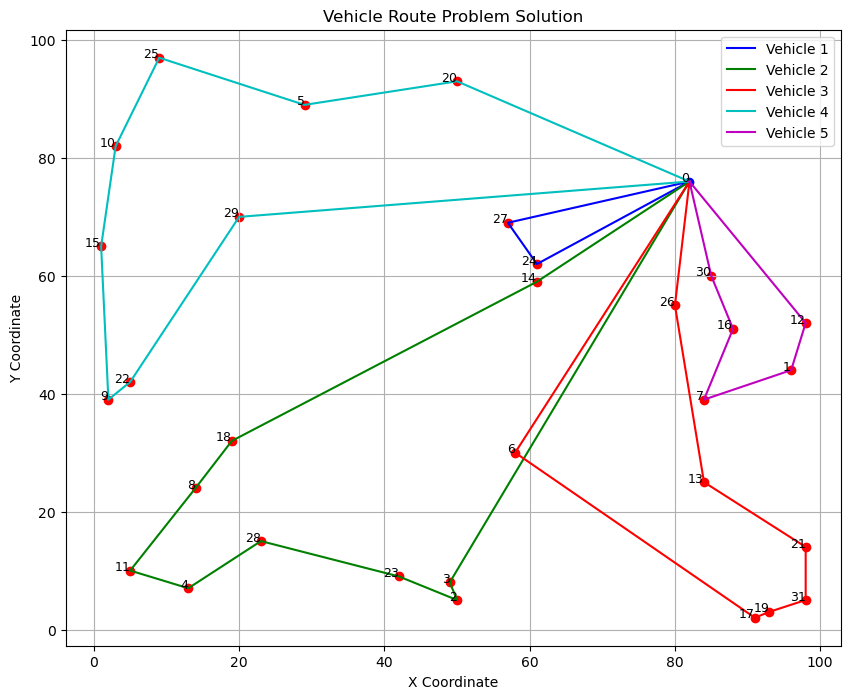

In [16]:
from matplotlib import pyplot as plt






def print_solution(data, manager, routing, solution):
    if solution:
        total_distance = 0
        routes = []
        for vehicle_id in range(data['num_vehicles']):
            index = routing.Start(vehicle_id)
            route = []
            route_distance = 0
            while not routing.IsEnd(index):
                node_index = manager.IndexToNode(index)
                route.append(node_index)
                previous_index = index
                index = solution.Value(routing.NextVar(index))
                route_distance += routing.GetArcCostForVehicle(
                    previous_index, index, vehicle_id)
            total_distance += route_distance
            #print(total_distance)
            routes.append(route)
        print(f'Total distance of all routes: {total_distance}m')
        return routes
    else:
        print('No solution found.')
        return []

        


def plot_CVRP_solution(routes, node_coords):

    plt.figure(figsize= (10,8))

    # plot nodes
    for i, (x,y) in enumerate(node_coords):
        plt.scatter(x,y, c = 'blue' if i ==0 else 'red')
        plt.text(x,y, f'{i}', fontsize = 9, ha='right')

    
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for vehicle, route in enumerate(routes):
        route_coords = [node_coords[0]] + [node_coords[node] for node in route] + [node_coords[0]]
        x_coords, y_coords = zip(*route_coords)
        plt.plot(x_coords, y_coords, c= colors[vehicle % len(colors)], label=f'Vehicle {vehicle +1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Vehicle Route Problem Solution')
    plt.legend()
    plt.grid(True)
    plt.show()




# Small

In [31]:
#root_folder = './data/cvrp/new_data/'  
#root_folder = './data/cvrp/solved'  
root_folder = './data/cvrp/small'  
#root_folder = './data/cvrp/medium'  
#root_folder = './data/cvrp/large'  
cvrp_instances = read_all_instances(root_folder, ending='.vrp')

for i in range(len(cvrp_instances)):
    data={}
    cvrp_instance = cvrp_instances[i]
    data["vehicle_capacity"] = cvrp_instance['capacity']
    data["depot"] = cvrp_instance['depot']
    data['demands'] = cvrp_instance['demand']
    data['distance_matrix'] = [[int(value) for value in row] for row in cvrp_instance['edge_weight']]
    data['locations'] = [tuple(row) for row in cvrp_instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    
    print("=====================",cvrp_instance['comment'],"=====================")
    match = re.search(r"No of trucks: (\d+)", str(cvrp_instance['comment']))  
    if match:  
        data["num_vehicles"] = int(match.group(1))  
    else:
        match_min_no_of_trucks = re.search(r"Min no of trucks: (\d+)", str(cvrp_instance['comment']))  
        if match_min_no_of_trucks:  
            data["num_vehicles"] = int(match_min_no_of_trucks.group(1))  
        else:  
            # 如果两种匹配都失败，返回 None 或处理异常  
            num_vehicles = None  

    solution,manager,routing = solve_cvrp(data)
    routes = print_solution(data, manager, routing, solution)
    #plot_CVRP_solution(routes, data['locations'])

Successfully read A-n32-k5.vrp
Successfully read A-n37-k5.vrp
Successfully read A-n48-k7.vrp
Successfully read P-n50-k10.vrp
===================== (Augerat et al, No of trucks: 5, Optimal value: 784) =====================
Total distance of all routes: 782m
===================== (Augerat et al, No of trucks: 5, Optimal value: 669) =====================
Total distance of all routes: 656m
===================== (Augerat et al, No of trucks: 7, Optimal value: 1073) =====================
Total distance of all routes: 1051m
===================== (Augerat et al, No of trucks: 10, Optimal value: 696) =====================
Total distance of all routes: 703m


# Medium

In [27]:
#root_folder = './data/cvrp/new_data/'  
#root_folder = './data/cvrp/solved'  
#root_folder = './data/cvrp/small'  
root_folder = './data/cvrp/medium'  
#root_folder = './data/cvrp/large'  
cvrp_instances = read_all_instances(root_folder, ending='.vrp')

for i in range(len(cvrp_instances)):
    data={}
    cvrp_instance = cvrp_instances[i]
    data["vehicle_capacity"] = cvrp_instance['capacity']
    data["depot"] = cvrp_instance['depot']
    data['demands'] = cvrp_instance['demand']
    data['distance_matrix'] = [[int(value) for value in row] for row in cvrp_instance['edge_weight']]
    data['locations'] = [tuple(row) for row in cvrp_instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    
    print("=====================",cvrp_instance['comment'],"=====================")
    match = re.search(r"No of trucks: (\d+)", str(cvrp_instance['comment']))  
    if match:  
        data["num_vehicles"] = int(match.group(1))  
    else:
        match_min_no_of_trucks = re.search(r"Min no of trucks: (\d+)", str(cvrp_instance['comment']))  
        if match_min_no_of_trucks:  
            data["num_vehicles"] = int(match_min_no_of_trucks.group(1))  
        else:  
            # 如果两种匹配都失败，返回 None 或处理异常  
            num_vehicles = None  

    solution,manager,routing = solve_cvrp(data)
    routes = print_solution(data, manager, routing, solution)
    #plot_CVRP_solution(routes, data['locations'])

Successfully read A-n53-k7.vrp
Successfully read A-n63-k10.vrp
Successfully read P-n65-k10.vrp
Successfully read A-n80-k10.vrp
Successfully read E-n76-k14.vrp
===================== (Augerat et al, No of trucks: 7, Optimal value: 1010) =====================
Total distance of all routes: 1028m
===================== (Augerat et al, No of trucks: 10, Optimal value: 1314) =====================
Total distance of all routes: 1335m
===================== (Augerat et al, No of trucks: 10, Optimal value: 792) =====================
Total distance of all routes: 785m
===================== (Augerat et al, No of trucks: 10, Optimal value: 1763) =====================
Total distance of all routes: 1831m
===================== (Christophides and Eilon, Min no of trucks: 14, Optimal value: 1021) =====================
Total distance of all routes: 1045m


# Large

In [25]:
#root_folder = './data/cvrp/new_data/'  
#root_folder = './data/cvrp/solved'  
#root_folder = './data/cvrp/small'  
#root_folder = './data/cvrp/medium'  
root_folder = './data/cvrp/large'  
cvrp_instances = read_all_instances(root_folder, ending='.vrp')

for i in range(len(cvrp_instances)):
    data={}
    cvrp_instance = cvrp_instances[i]
    data["vehicle_capacity"] = cvrp_instance['capacity']
    data["depot"] = cvrp_instance['depot']
    data['demands'] = cvrp_instance['demand']
    data['distance_matrix'] = [[int(value) for value in row] for row in cvrp_instance['edge_weight']]
    data['locations'] = [tuple(row) for row in cvrp_instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    
    print("=====================",cvrp_instance['comment'],"=====================")
    match = re.search(r"No of trucks: (\d+)", str(cvrp_instance['comment']))  
    if match:  
        data["num_vehicles"] = int(match.group(1))  
    else:
        match_min_no_of_trucks = re.search(r"Min no of trucks: (\d+)", str(cvrp_instance['comment']))  
        if match_min_no_of_trucks:  
            data["num_vehicles"] = int(match_min_no_of_trucks.group(1))  
        else:  
            # 如果两种匹配都失败，返回 None 或处理异常  
            num_vehicles = None  

    solution,manager,routing = solve_cvrp(data)
    routes = print_solution(data, manager, routing, solution)
    #plot_CVRP_solution(routes, data['locations'])

Successfully read X-n120-k6.vrp
Successfully read X-n115-k10.vrp
Successfully read X-n139-k10.vrp
Successfully read X-n110-k13.vrp
===================== "Generated by Uchoa, Pecin, Pessoa, Poggi, Subramanian, and Vidal (2013),, Min no of trucks: 6" =====================
Total distance of all routes: 13995m
===================== "Generated by Uchoa, Pecin, Pessoa, Poggi, Subramanian, and Vidal (2013), Min no of trucks: 10" =====================
Total distance of all routes: 13484m
===================== "Generated by Uchoa, Pecin, Pessoa, Poggi, Subramanian, and Vidal (2013), Min no of trucks: 10" =====================
Total distance of all routes: 14598m
===================== "Generated by Uchoa, Pecin, Pessoa, Poggi, Subramanian, and Vidal (2013),Min no of trucks: 13" =====================
Total distance of all routes: 15550m


# Solved

Successfully read A-n45-k6.vrp
Successfully read P-n60-k10.vrp
Successfully read E-n101-k14.vrp
===================== (Augerat et al, No of trucks: 6, Optimal value: 944) =====================
Number of Nodes: 32
Total distance of all routes: 1034m


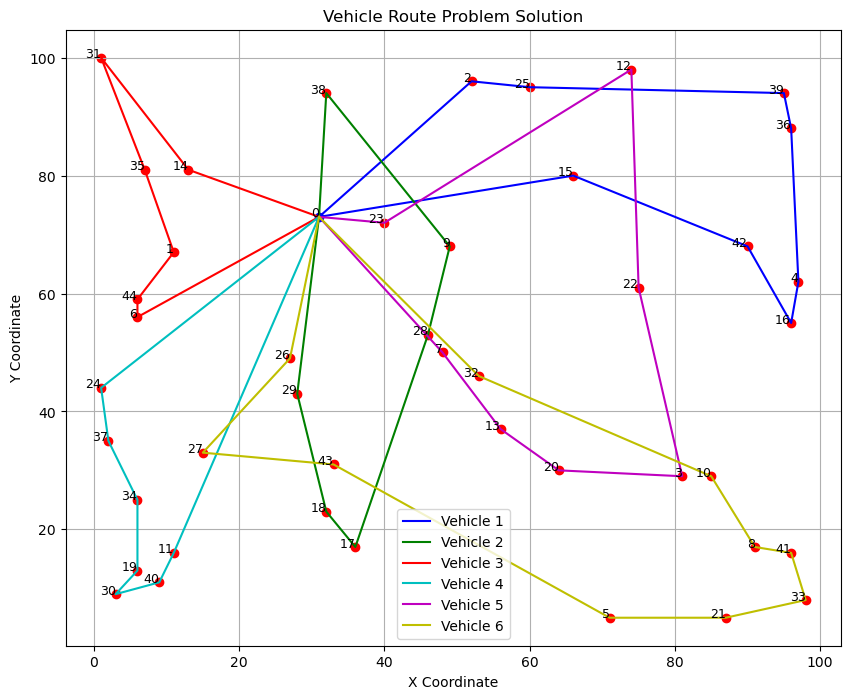

===================== (Augerat et al, No of trucks: 10, Optimal value: 744) =====================
Number of Nodes: 32
Total distance of all routes: 759m


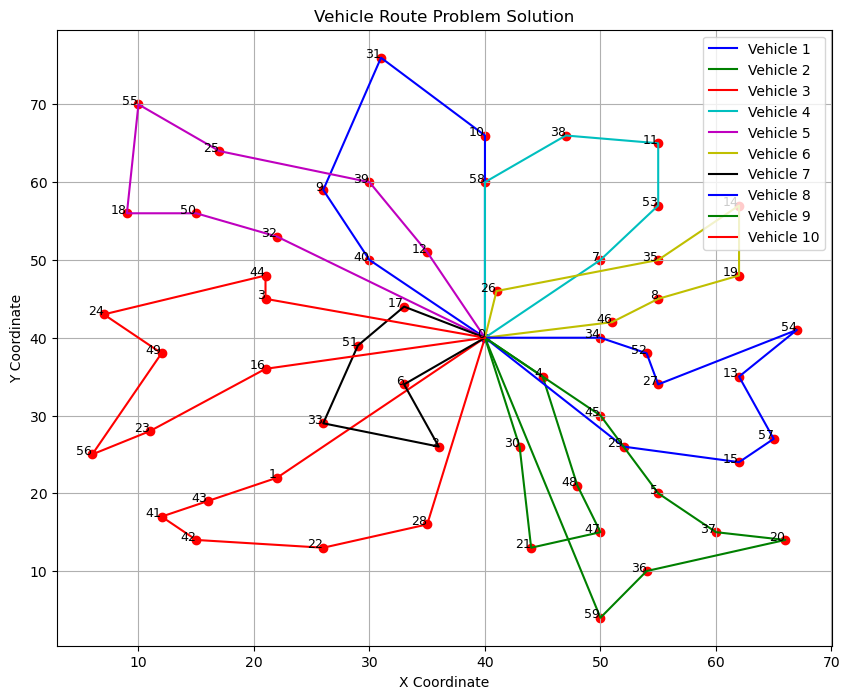

===================== (Christophides and Eilon, Min no of trucks: 14, Best value: 1071) =====================
Number of Nodes: 32
Total distance of all routes: 1083m


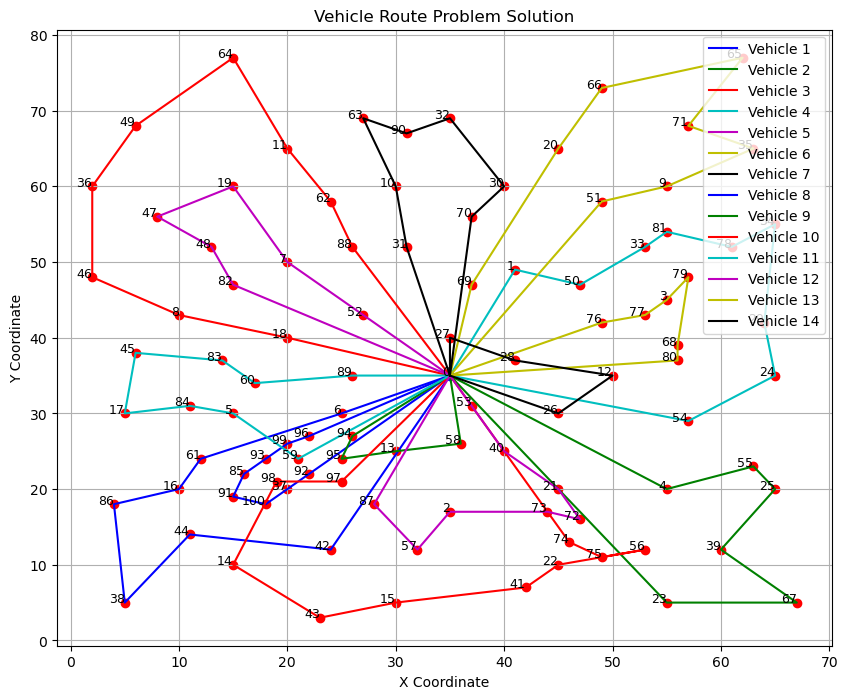

In [19]:
#root_folder = './data/cvrp/new_data/'  
root_folder = './data/cvrp/solved'  
#root_folder = './data/cvrp/small'  
#root_folder = './data/cvrp/medium'  
#root_folder = './data/cvrp/large'  
cvrp_instances = read_all_instances(root_folder, ending='.vrp')

for i in range(len(cvrp_instances)):
    data={}
    cvrp_instance = cvrp_instances[i]
    data["vehicle_capacity"] = cvrp_instance['capacity']
    data["depot"] = cvrp_instance['depot']
    data['demands'] = cvrp_instance['demand']
    data['distance_matrix'] = [[int(value) for value in row] for row in cvrp_instance['edge_weight']]
    data['locations'] = [tuple(row) for row in cvrp_instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    
    print("=====================",cvrp_instance['comment'],"=====================")
    match = re.search(r"No of trucks: (\d+)", str(cvrp_instance['comment']))  
    if match:  
        data["num_vehicles"] = int(match.group(1))  
    else:
        match_min_no_of_trucks = re.search(r"Min no of trucks: (\d+)", str(cvrp_instance['comment']))  
        if match_min_no_of_trucks:  
            data["num_vehicles"] = int(match_min_no_of_trucks.group(1))  
        else:  
            # 如果两种匹配都失败，返回 None 或处理异常  
            num_vehicles = None  


    
    num_nodes = len(node_coords)
    print("Number of Nodes:",num_nodes)
    solution,manager,routing = solve_cvrp(data)
    routes = print_solution(data, manager, routing, solution)
    plot_CVRP_solution(routes, data['locations'])

In [ ]:
instances = read_all_instances('./data/cvrp','.vrp')
def create_data_model(instance):
    data = {}
    # 基础参数设置
    
    data["vehicle_capacity"] = instance['capacity']
    data["num_vehicles"] = int(re.search(r'k(\d+)', instance['name']).group(1))
    data["depot"] = instance['depot']
    data['locations'] = [tuple(row) for row in instance['node_coord'].tolist()]
    data["num_locations"] = len(data["locations"])
    data['demands'] = instance['demand']
    data['distance_matrix']= [[int(value) for value in row] for row in instance['edge_weight']] 
    
    return data